In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
# plt.rcParams['svg.fonttype'] = 'none'

In [2]:
bc_nms = [
    "H3K4me3", 
    "H3K27ac", 
    "H3K27me3", "EZH2", "EED", "SUZ12", "AEBP2", 
    "MED12", "CycC", 
    "H3K27M",
    "EGFR", "HA-Tag"
]

In [3]:
def CalcPQFromUMICnts(raw_cnts):
    PQ_prop = []
    PQ_Ctrl_normed = []
    for i in range(len(raw_cnts)):
        PQ_prop.append([x / sum(raw_cnts[i]) for x in raw_cnts[i]])
        PQ_Ctrl_normed.append([x / (raw_cnts[i][7] + raw_cnts[i][8]) for x in raw_cnts[i]])

    PQ_prop_avg = []
    PQ_Ctrl_normed_avg = []
    for i in range(len(raw_cnts[0])):
        curr_col = [x[i] for x in PQ_prop]
        PQ_prop_avg.append(np.mean(curr_col))

        curr_norm_col = [x[i] for x in PQ_Ctrl_normed]
        PQ_Ctrl_normed_avg.append(np.mean(curr_norm_col))

    return PQ_prop, PQ_prop_avg, PQ_Ctrl_normed, PQ_Ctrl_normed_avg

In [4]:
# Numbers migrated from outputs of running PQSeq_Data_Analysis.py; see below for the annotation of samples
WT_PQ_raw = [
    [7998, 79057, 4976, 7628, 9876, 28146, 4668, 4369, 15564, 3338, 948, 3369],
    [6978, 67623, 4735, 6725, 9034, 24761, 4213, 3819, 13501, 2745, 767, 2750],
    [7335, 71958, 4648, 7001, 9867, 25464, 4301, 4016, 14023, 2836, 849, 2761],
    [7615, 82580, 5877, 7450, 11177, 30368, 4986, 4577, 16219, 3194, 968, 3391]
]


WT_PQ_prop, WT_PQ_avg, WT_PQ_ctrl_normed, WT_PQ_ctrl_normed_avg = CalcPQFromUMICnts(WT_PQ_raw)

K27M_PQ_raw = [
    [5241,100542,2526,5207,8057,21503,3340,3398,11813,31482,639,2333],
    [5373,102618,2538,5246,8143,21775,3432,3446,11787,32472,625,2365],
    [4978,101380,2804,4775,7106,20453,3101,3369,11732,32550,669,2508],
    [6185,118166,2536,4877,7538,22324,3102,3364,12099,35527,608,2455]
]

K27M_PQ_prop, K27M_PQ_avg, K27M_PQ_ctrl_normed, K27M_PQ_ctrl_normed_avg = CalcPQFromUMICnts(K27M_PQ_raw)

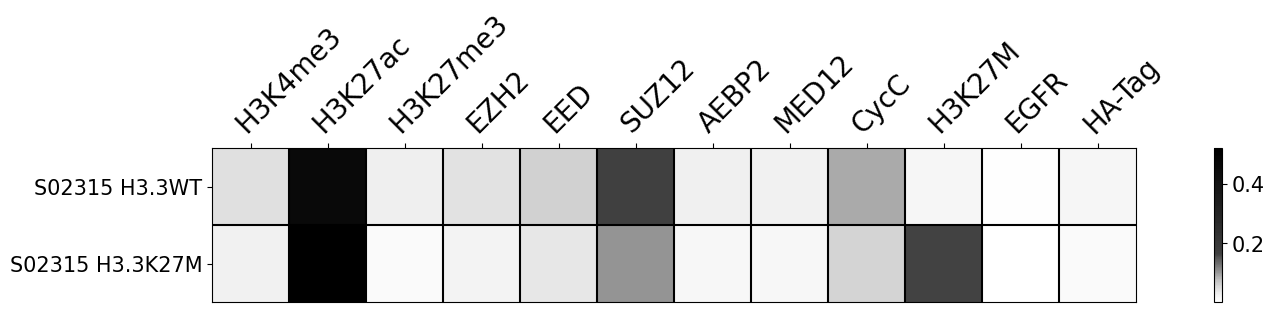

In [5]:
color_thres_num = 80
colors1 = plt.cm.Greys(np.linspace(0, 0.8, color_thres_num))
colors2 = plt.cm.Greys(np.linspace(0.8, 1, 256 - color_thres_num))
colors = np.vstack((colors1, colors2))
customized_cmap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

# Multiple plots together as one figure; Prod263
plot_data = [WT_PQ_avg, K27M_PQ_avg]
fig, ax = plt.subplots(figsize = (20, len(plot_data)))

plot_barcodes = bc_nms

im = ax.imshow(plot_data, cmap = customized_cmap)
cbar = fig.colorbar(im, ax = ax)
cbar.ax.tick_params(labelsize = 15)

ax.set_xticks(np.arange(len(plot_barcodes)))
ax.set_yticks([x for x in range(len(plot_data))])
ax.set_xticklabels(plot_barcodes, fontsize = 20)
ax.set_yticklabels(["S02315 H3.3WT", "S02315 H3.3K27M"], fontsize = 15)


ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation = 45, ha = "left",
     rotation_mode = "anchor")

for i in range(len(plot_barcodes) - 1):
    ax.plot([i + 0.5, i + 0.5], [-0.5, -0.5 + len(plot_data)], color = "black", lw = 1.5)

for i in range(len(plot_data) - 1):
    ax.plot([-0.5, -0.5 + len(plot_barcodes)], [i + 0.5, i + 0.5], color = "black", lw = 1.5)
# fig.savefig("Supp_S02315_PQ_depthnorm.svg", dpi = 1200)